In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.spatial.transform import Rotation as Rot
import json
from simarUtils import *
import torchvision

ModuleNotFoundError: No module named 'cv2'

In [ ]:
debug_aloha_data = h5py.File("/coc/flash9/datasets/Egoplay/CLOTHFOLD_ROBOTWA//coc/flash9/datasets/Egoplay/CLOTHFOLD_ROBOTWA/converted/clothfold_robotwa.hdf5", "r")
nds(debug_aloha_data)

## VIZ ACTIONS

(10, 6)


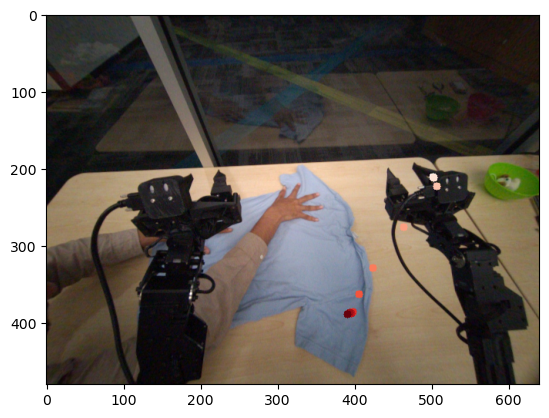

In [48]:
T = 2000
actions_xyz = debug_aloha_data["data/demo_0/actions_xyz"][T]
print(actions_xyz.shape)
left_actions = debug_aloha_data["data/demo_0/actions_xyz"][T][:, :3]
right_actions = debug_aloha_data["data/demo_0/actions_xyz"][T][:, 3:]
px1 = cam_frame_to_cam_pixels(left_actions, ARIA_INTRINSICS)
px2 = cam_frame_to_cam_pixels(right_actions, ARIA_INTRINSICS)

img = debug_aloha_data["data/demo_0/obs/front_img_1"][T]
# img = draw_dot_on_frame(img, px1, show=False)
img = draw_dot_on_frame(img, px2, show=False, palette="Reds")

plt.imshow(img)

## VIZ ACTIONS - ACT

(100, 6)


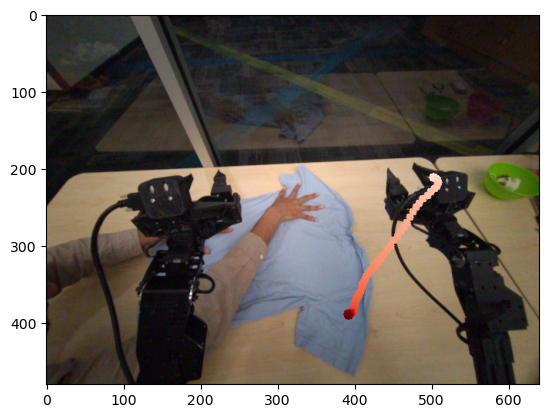

In [47]:
T = 2000
actions_xyz_act = debug_aloha_data["data/demo_0/actions_xyz_act"][T]
print(actions_xyz_act.shape)
left_actions = debug_aloha_data["data/demo_0/actions_xyz_act"][T][:, :3]
right_actions = debug_aloha_data["data/demo_0/actions_xyz_act"][T][:, 3:]
px1 = cam_frame_to_cam_pixels(left_actions, ARIA_INTRINSICS)
px2 = cam_frame_to_cam_pixels(right_actions, ARIA_INTRINSICS)

img = debug_aloha_data["data/demo_0/obs/front_img_1"][T]
# img = draw_dot_on_frame(img, px1, show=False)
img = draw_dot_on_frame(img, px2, show=False, palette="Reds")

plt.imshow(img)

### VIZ JOINTS

(10, 14)
left pos (10, 3)
right pos (10, 3)
after concat: (10, 6)
(10, 6)


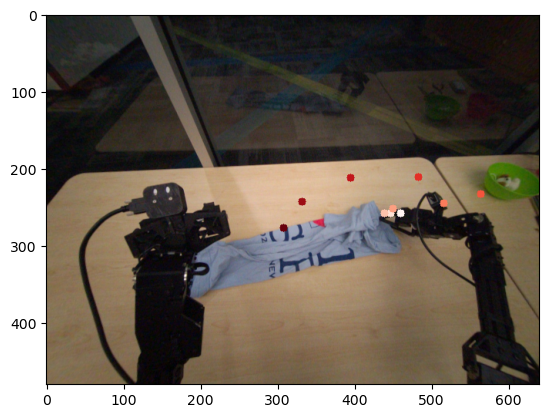

In [86]:
from aloha_to_robomimicv2 import *

aloha_fk = AlohaFK()

POINT_GAP = 2
FUTURE_POINTS_COUNT = 100

left_extrinsics = EXTRINSICS["ariaJul29"]["left"]
right_extrinsics = EXTRINSICS["ariaJul29"]["right"]

T = 1250
actions_joints = debug_aloha_data["data/demo_0/actions_joints"][T]
print(actions_joints.shape)

joint_left_start = 0
joint_left_end = 7
joint_right_start = 7
joint_right_end = 14

fk_left_joint_actions = debug_aloha_data["data/demo_0/actions_joints"][T]
fk_left_positions = aloha_fk.fk(fk_left_joint_actions[:, joint_left_start:joint_left_end - 1])
fk_left_positions = ee_pose_to_cam_frame(
    fk_left_positions, left_extrinsics
)[:, :3]

fk_right_joint_actions = debug_aloha_data["data/demo_0/actions_joints"][T]
fk_right_positions = aloha_fk.fk(fk_right_joint_actions[:, joint_right_start:joint_right_end - 1])
fk_right_positions = ee_pose_to_cam_frame(
    fk_right_positions, right_extrinsics
)[:, :3]


print("left pos", fk_left_positions.shape)
print("right pos", fk_right_positions.shape)

fk_positions = np.concatenate([fk_left_positions, fk_right_positions], axis=-1)
print("after concat:", fk_positions.shape)

## prestack stuff
# fk_positions = get_future_points(fk_positions, POINT_GAP=POINT_GAP, FUTURE_POINTS_COUNT=FUTURE_POINTS_COUNT)
# fk_positions_sampled = sample_interval_points(fk_positions, POINT_GAP=POINT_GAP, FUTURE_POINTS_COUNT=FUTURE_POINTS_COUNT)


print(fk_positions.shape)
px1 = cam_frame_to_cam_pixels(fk_positions[:, :3], ARIA_INTRINSICS)
px2 = cam_frame_to_cam_pixels(fk_positions[:, 3:], ARIA_INTRINSICS)
img = debug_aloha_data["data/demo_0/obs/front_img_1"][T]
# img = draw_dot_on_frame(img, px1, show=False)
img = draw_dot_on_frame(img, px2, show=False, palette="Reds")

plt.imshow(img)

### VIZ JOINTS -ACT

(100, 14)
left pos (100, 3)
right pos (100, 3)
after concat: (100, 6)
(100, 6)


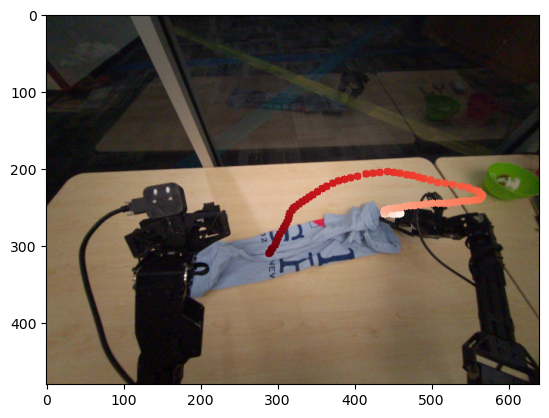

In [87]:
from aloha_to_robomimicv2 import *

aloha_fk = AlohaFK()

POINT_GAP = 2
FUTURE_POINTS_COUNT = 100

left_extrinsics = EXTRINSICS["ariaJul29"]["left"]
right_extrinsics = EXTRINSICS["ariaJul29"]["right"]

T = 1250
actions_joints = debug_aloha_data["data/demo_0/actions_joints_act"][T]
print(actions_joints.shape)

joint_left_start = 0
joint_left_end = 7
joint_right_start = 7
joint_right_end = 14

fk_left_joint_actions = debug_aloha_data["data/demo_0/actions_joints_act"][T]
fk_left_positions = aloha_fk.fk(fk_left_joint_actions[:, joint_left_start:joint_left_end - 1])
fk_left_positions = ee_pose_to_cam_frame(
    fk_left_positions, left_extrinsics
)[:, :3]

fk_right_joint_actions = debug_aloha_data["data/demo_0/actions_joints_act"][T]
fk_right_positions = aloha_fk.fk(fk_right_joint_actions[:, joint_right_start:joint_right_end - 1])
fk_right_positions = ee_pose_to_cam_frame(
    fk_right_positions, right_extrinsics
)[:, :3]


print("left pos", fk_left_positions.shape)
print("right pos", fk_right_positions.shape)

fk_positions = np.concatenate([fk_left_positions, fk_right_positions], axis=-1)
print("after concat:", fk_positions.shape)

## prestack stuff
# fk_positions = get_future_points(fk_positions, POINT_GAP=POINT_GAP, FUTURE_POINTS_COUNT=FUTURE_POINTS_COUNT)
# fk_positions_sampled = sample_interval_points(fk_positions, POINT_GAP=POINT_GAP, FUTURE_POINTS_COUNT=FUTURE_POINTS_COUNT)


print(fk_positions.shape)
px1 = cam_frame_to_cam_pixels(fk_positions[:, :3], ARIA_INTRINSICS)
px2 = cam_frame_to_cam_pixels(fk_positions[:, 3:], ARIA_INTRINSICS)
img = debug_aloha_data["data/demo_0/obs/front_img_1"][T]
# img = draw_dot_on_frame(img, px1, show=False)
img = draw_dot_on_frame(img, px2, show=False, palette="Reds")

plt.imshow(img)

### VIZ OBS - EE_POSE

(6,)


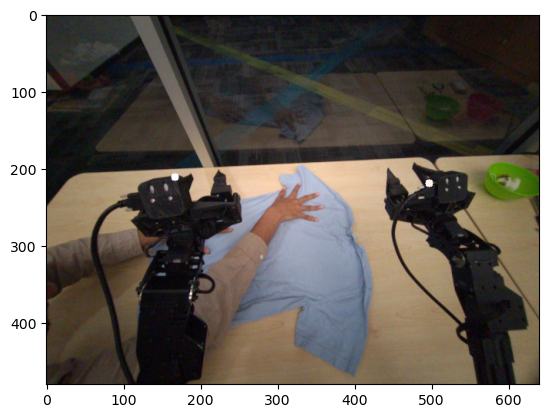

In [98]:
T = 2000
ee_pose = debug_aloha_data["data/demo_0/obs/ee_pose"][T]
print(ee_pose.shape)
ee_pose_left = debug_aloha_data["data/demo_0/obs/ee_pose"][T][:3]
ee_pose_right = debug_aloha_data["data/demo_0/obs/ee_pose"][T][3:]
px1 = cam_frame_to_cam_pixels(np.expand_dims(ee_pose_left, axis=0), ARIA_INTRINSICS)
px2 = cam_frame_to_cam_pixels(np.expand_dims(ee_pose_right, axis=0), ARIA_INTRINSICS)

img = debug_aloha_data["data/demo_0/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px1, show=False)
img = draw_dot_on_frame(img, px2, show=False, palette="Reds")

plt.imshow(img)

### VIZ OBS - EE_POSE

(14,)
left pos (1, 3)
right pos (1, 3)
after concat: (1, 6)
(1, 6)


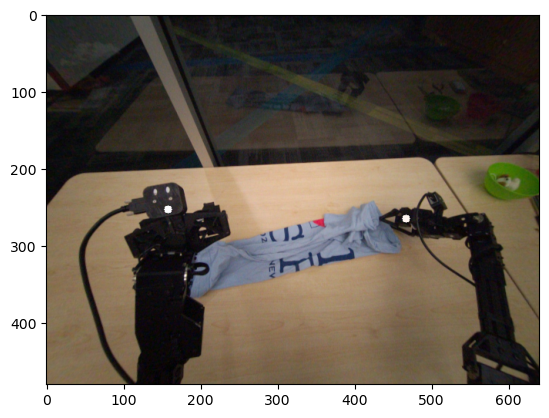

In [102]:
from aloha_to_robomimicv2 import *

aloha_fk = AlohaFK()

POINT_GAP = 2
FUTURE_POINTS_COUNT = 100

left_extrinsics = EXTRINSICS["ariaJul29"]["left"]
right_extrinsics = EXTRINSICS["ariaJul29"]["right"]

T = 1250
joint_positions = debug_aloha_data["data/demo_0/obs/joint_positions"][T]
print(joint_positions.shape)

joint_left_start = 0
joint_left_end = 7
joint_right_start = 7
joint_right_end = 14

fk_left_joint_positions= np.expand_dims(debug_aloha_data["data/demo_0/obs/joint_positions"][T], axis=0)
fk_left_positions = aloha_fk.fk(fk_left_joint_positions[:, joint_left_start:joint_left_end - 1])
fk_left_positions = ee_pose_to_cam_frame(
    fk_left_positions, left_extrinsics
)[:, :3]

fk_right_joint_positions = np.expand_dims(debug_aloha_data["data/demo_0/obs/joint_positions"][T], axis=0)
fk_right_positions = aloha_fk.fk(fk_right_joint_positions[:, joint_right_start:joint_right_end - 1])
fk_right_positions = ee_pose_to_cam_frame(
    fk_right_positions, right_extrinsics
)[:, :3]


print("left pos", fk_left_positions.shape)
print("right pos", fk_right_positions.shape)

fk_positions = np.concatenate([fk_left_positions, fk_right_positions], axis=-1)
print("after concat:", fk_positions.shape)

## prestack stuff
# fk_positions = get_future_points(fk_positions, POINT_GAP=POINT_GAP, FUTURE_POINTS_COUNT=FUTURE_POINTS_COUNT)
# fk_positions_sampled = sample_interval_points(fk_positions, POINT_GAP=POINT_GAP, FUTURE_POINTS_COUNT=FUTURE_POINTS_COUNT)


print(fk_positions.shape)
px1 = cam_frame_to_cam_pixels(fk_positions[:, :3], ARIA_INTRINSICS)
px2 = cam_frame_to_cam_pixels(fk_positions[:, 3:], ARIA_INTRINSICS)
img = debug_aloha_data["data/demo_0/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px1, show=False)
img = draw_dot_on_frame(img, px2, show=False, palette="Reds")

plt.imshow(img)

In [92]:
debug_aloha_data["data/demo_0/obs/ee_pose"]

<HDF5 dataset "ee_pose": shape (5000, 6), type "<f8">